In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import make_numpy_array_1000, plot_linear, chi_squared
import os
import glob
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [11]:
plt.style.use('classic')
np.set_printoptions(suppress = True)
warnings.filterwarnings('ignore')

In [12]:
all_files = os.listdir('.')
dat_files = sorted(glob.glob('*1000.dat'))
    
print(all_files)
print(dat_files)

dy_low, dy_high, X_test, X_train, y_train = [make_numpy_array_1000(dat_files[i]) for i in range(len(dat_files))]

['y1_lin.dat', 'y1_lin_ntot_1000.dat', 'x1_lin_ext.dat', '__pycache__', 'ey1_lin_high.dat', 'lin_1000.ipynb', 'x1_lin_ext_ntot_1000.dat', 'ey1_lin_high_ntot_1000.dat', 'x1_lin.dat', 'functions.py', 'ey1_lin.dat', 'output.png', 'x1_lin_ntot_1000.dat', 'lin_100.ipynb', 'ey1_lin_ntot_1000.dat']
['ey1_lin_high_ntot_1000.dat', 'ey1_lin_ntot_1000.dat', 'x1_lin_ext_ntot_1000.dat', 'x1_lin_ntot_1000.dat', 'y1_lin_ntot_1000.dat']


In [13]:
print(f'Dy low shape: {dy_low.shape}')
print(f'Dy high shape: {dy_high.shape}')
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')

Dy low shape: (999,)
Dy high shape: (999,)
X train shape: (999,)
X test shape: (999,)
y train shape: (999,)


In [14]:
data = pd.DataFrame({'dy_low':dy_low, 'dy_high':dy_high, 'X_train':X_train, 'X_test':X_test, 'y_train':y_train})

In [15]:
data = data.drop_duplicates()

In [16]:
data.isnull().sum()

dy_low     0
dy_high    0
X_train    0
X_test     0
y_train    0
dtype: int64

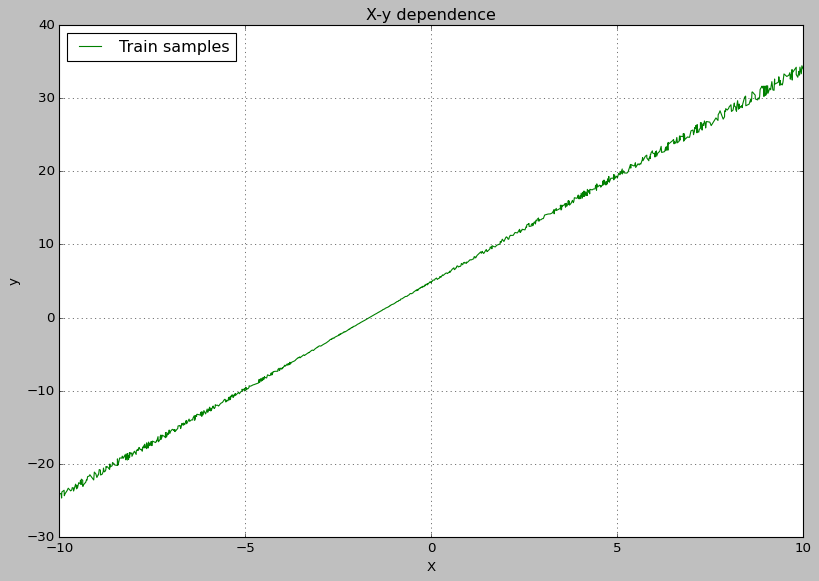

In [17]:
plt.figure(figsize = (12,8))
sns.lineplot(x = X_train, y = y_train, lw = 1, color = 'green', label = 'Train samples')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.title('X-y dependence')
plt.legend(loc = 'upper left')
plt.show();

In [18]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

indexes_of_val = []
for i in range(X_val.shape[0]):
    indexes_of_val.append(np.where(np.isclose(X_train, X_val[i])))
indexes_of_val = list(map(lambda x: x[0], (map(lambda x: x[0], indexes_of_val))))
print(len(indexes_of_val))
print(indexes_of_val)

print(f'X train split shape: {X_train_split.shape}')
print(f'X val shape: {X_val.shape}')
print(f'y train split shape: {y_train_split.shape}')
print(f'y val shape: {y_val.shape}')

100
[453, 793, 209, 309, 740, 578, 895, 545, 436, 678, 935, 635, 866, 603, 720, 70, 824, 468, 382, 208, 570, 377, 898, 887, 901, 59, 168, 249, 810, 344, 595, 318, 625, 542, 622, 694, 158, 198, 662, 597, 788, 380, 937, 425, 199, 576, 266, 737, 76, 870, 634, 526, 953, 23, 30, 327, 10, 539, 541, 736, 54, 677, 872, 514, 707, 371, 507, 710, 260, 882, 96, 107, 650, 174, 521, 913, 39, 715, 522, 974, 66, 558, 67, 880, 352, 433, 649, 513, 449, 485, 365, 448, 823, 516, 797, 88, 63, 825, 620, 843]
X train split shape: (899,)
X val shape: (100,)
y train split shape: (899,)
y val shape: (100,)


In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_split.reshape(-1,1), y_train_split)
val_pred = lin_reg.predict(X_val.reshape(-1,1))
y_pred = lin_reg.predict(X_test.reshape(-1,1))

In [24]:
print(f'MSE: {mean_squared_error(y_val, val_pred)}')
print(f'R2 score: {r2_score(y_val, val_pred)}')
chi_squared_low = chi_squared(y_val, val_pred, dy_low[indexes_of_val])
chi_squared_high = chi_squared(y_val, val_pred, dy_high[indexes_of_val])
print(f'Chi Squared-low: {chi_squared_low}')
print(f'Chi Squared-high: {chi_squared_high}')

MSE: 0.06314469972214065
R2 score: 0.9997500013228231
Chi Squared-low: 0.025060279453629063
Chi Squared-high: 0.2255482791878832


In [26]:
print(f'Coefficent: {lin_reg.coef_[0]}, intercept: {lin_reg.intercept_}')

Coefficent: 2.9222230710056594, intercept: 4.857504690041198


In [36]:
y_pred.min()

34.0847031793185

In [38]:
y_train.mean()

3.9877800800800807

In [35]:
y_train.max()

34.426